Preparacion de datos para poder construir un modelo predictivo que permita calcular el revenue por pais en un mes futuro.


In [1]:
import pandas as pd # importar librerias pandas
import numpy as np # importar libreria numpy
import sklearn.metrics # importar libreria sklearn

In [2]:

#Cargo el archivo
file_runrates ='https://raw.githubusercontent.com/jzuluagams/Eafit_AI/main/Dataset_Runrates.xlsx' # Cargar archivo fuente, updated URL to raw content
runrates = pd.read_excel(file_runrates) # Lectura de archivo y cargarlo a la variable runrates
print(runrates.columns)
runrates.head()

Index(['Country', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country,Service Line,Product Line,Business ID,Year,Month,Sales
0,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jan,755
1,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Mar,1465
2,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Apr,781
3,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - May,918
4,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jul,978


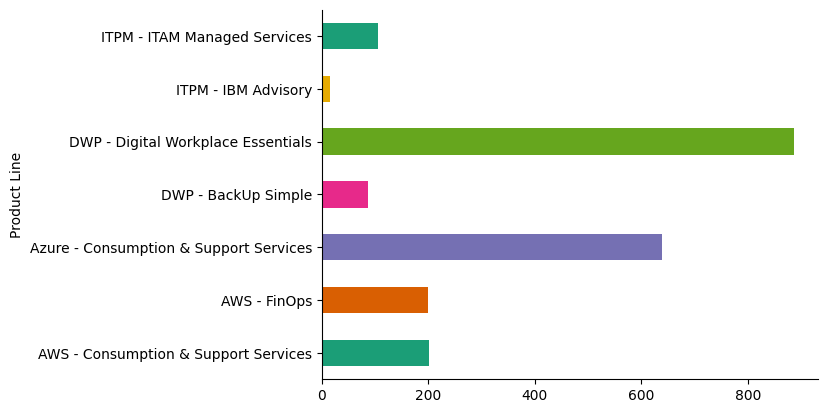

In [3]:
# @title Product Line

from matplotlib import pyplot as plt
import seaborn as sns
runrates.groupby('Product Line').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
# Calculando mediana, minimo, maximo
mean_sales = runrates['Sales'].mean()
min_sales = runrates['Sales'].min()
max_sales = runrates['Sales'].max()
print(mean_sales)
print(min_sales)
print(max_sales)

5145.966292134832
-33910
294006


In [5]:
runrates['Country_Code'] = runrates['Country'].str[:5]  # Extraer 5 caracteres correspondientes al codigo del Pais
runrates['Country_Name'] = runrates['Country'].str[8:]  # Dejar desde el caracter 8 en adelante el nombre del pais

print(runrates[['Country_Code', 'Country_Name']].head())

  Country_Code Country_Name
0        3-032    Argentina
1        3-032    Argentina
2        3-032    Argentina
3        3-032    Argentina
4        3-032    Argentina


In [6]:
runrates.head()

,Country,Service Line,Product Line,Business ID,Year,Month,Sales,Country_Code,Country_Name
0,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jan,755,3-032,Argentina
1,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Mar,1465,3-032,Argentina
2,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Apr,781,3-032,Argentina
3,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - May,918,3-032,Argentina
4,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jul,978,3-032,Argentina


In [7]:
# Borrar la Columna Original 'Country'
runrates = runrates.drop('Country', axis=1)

In [8]:

# Reordenar Columnas, 'Country_Code' y 'Country_Name' como Columnas iniciales
new_column_order = ['Country_Code', 'Country_Name'] + [col for col in runrates.columns if col not in ['Country_Code', 'Country_Name']]
runrates = runrates[new_column_order]

print(runrates.columns)

Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


In [9]:
# Modificar Columna Month

runrates['Extract_Year'] = runrates['Month'].str[:6]  # Extraer 6 caracteres correspondientes al codigo del Pais
runrates['Month'] = runrates['Month'].str[7:]  # Dejar desde el caracter 7 en adelante el nombre del mes

print(runrates[['Extract_Year', 'Month']].head())

  Extract_Year Month
0       2023 -   Jan
1       2023 -   Mar
2       2023 -   Apr
3       2023 -   May
4       2023 -   Jul


In [10]:
runrates = runrates.drop('Extract_Year', axis=1)


In [11]:
print(runrates.columns)
runrates.head()

Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


,Country_Code,Country_Name,Service Line,Product Line,Business ID,Year,Month,Sales
0,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Jan,755
1,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Mar,1465
2,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Apr,781
3,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,May,918
4,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Jul,978


In [12]:
# Borrar la Columna Original 'Country'
runrates = runrates.drop('Country_Code', axis=1)

In [13]:
# Assuming 'runrates' is your DataFrame
runrates['Business ID'] = runrates['Business ID'].astype(str)
runrates['Month'] = runrates['Month'].astype(str)
runrates['Service Line'] = runrates['Service Line'].astype(str)
runrates['Product Line'] = runrates['Product Line'].astype(str)

# Check if the conversion was successful
print(runrates['Business ID'].dtype)

object


In [ ]:
# Crear un modelo de datos usando Linear SVR

#from sklearn.svm import LinearSVR

# Crear instancia

#Modelo = LinearSVR()

# Entrenar el modelo

#Modelo.fit(X, y)

#def predict_sales(Country_Name, Service_Line, Product_Line, Business_ID, Month):
    # Create a DataFrame for the input data
#    input_data = pd.DataFrame({
#        'Country_Name': [Country_Name],
#        'Service Line': [Service_Line],
#        'Product Line': [Product_Line],
#        'Business ID': [Business_ID],
#        'Month': [Month],
#        'Year': [2024]  # Assuming you want to predict for the current year
#    })

    # Use the trained pipeline to make the prediction
#    predicted_sales = pipeline.predict(input_data)

#    return predicted_sales[0]  # Return the predicted sales value

In [18]:
!pip install scikit-learn

import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# 1. Feature Engineering:
#    - Convert categorical features to numerical using one-hot encoding.
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']  # Add 'Month' to categorical features
numerical_features = [col for col in runrates.columns if col not in categorical_features + ['Sales']]

# 2. Select features and target variable:
X = runrates.drop('Sales', axis=1)  # Use all columns except 'Sales' as features
y = runrates['Sales']

print('Imprimiendo las columnas x')
print(X.columns)
print('Imprimiendo las caracteristicas de  y')
print(y.head())

# 3. Preprocess data:
#    - Use ColumnTransformer to apply different preprocessing to numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Create a pipeline that includes preprocessing and model training:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearSVR())
])

# 5. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 6. Train the model using the pipeline:
pipeline.fit(X_train, y_train)

# 7. Make predictions on the test set:
#y_pred = pipeline.predict(X_test) # Option 1 usando datos de prueba

# Create a DataFrame for the new data you want to predict # option 2 usando un dataframe con datos
new_data = pd.DataFrame({
    'Country_Name': ['Colombia'],
    'Service Line': ['Cloud Services AWS'],
    'Product Line': ['AWS - FinOps'],
    'Business ID': ['PYC AWS - PYC Simple for AWS'],
    'Month': ['Jun'],
    'Year': [2025]
})

# Use the trained pipeline to make the prediction on the new data
y_pred_new = pipeline.predict(new_data)
print('El Revenue en CHF es:')
#y_pred_new = 'El Revenue en CHF en el mes ' + str(Month) + ' es de ' + str(y_pred_new) + 'CHF
print(y_pred_new)
#print(y_pred)

# 8. Evaluate the model (example using Mean Squared Error):
#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

# 9. (Optional) Function to predict sales for new data:
#def predict_sales(input_data):
    # Ensure input_data is a DataFrame with the same columns as X
 #   predicted_sales = pipeline.predict(input_data)
 #   return predicted_sales

Imprimiendo las columnas x
Index(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month'],
      dtype='object')
Imprimiendo las caracteristicas de  y
0     755
1    1465
2     781
3     918
4     978
Name: Sales, dtype: int64
El Revenue en CHF es:
[471.01651963]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 93395269.62553562
RMSE: 9664.122806832269
MAE: 4487.4356512489285
R-squared: -0.21561275125814694


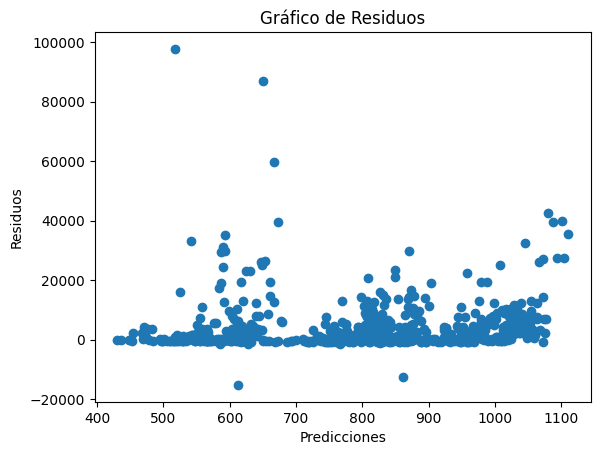

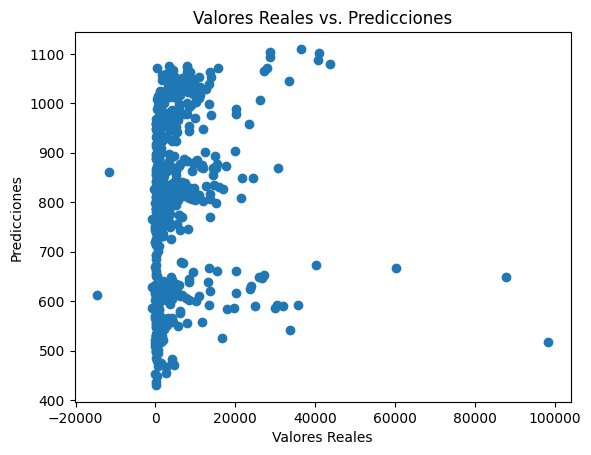

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba - uncomment this line
y_pred = pipeline.predict(X_test)

# Métricas de error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Gráfico de residuos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.show()